In [1]:
from astropy.table import Table
from synphot import SourceSpectrum, SpectralElement, units
from synphot.models import Empirical1D
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np

In [2]:
filternam = 'cs_sdss-r'

In [3]:
if filternam == 'R':
    filfil = '../Filters/Johnson-R.ecsv'
    rangelow = 5500
    rangehigh = 9000
elif filternam == 'sdss-r':
    filfil = '../Filters/sdss-r.ecsv'
    rangelow = 5000
    rangehigh = 7500
elif filternam == 'cs_sdss-r':
    filfil = '../Filters/cs_sdss.ecsv'
    rangelow = 5000
    rangehigh = 7500

In [4]:
sky = Table.read("..\Skinakas Sky\skinakassky.ecsv", format='ascii.ecsv')
filtertrans = Table.read(filfil, format='ascii.ecsv')
skyws = np.linspace(start=min(sky['Wavelength (A)']), stop=max(
    sky['Wavelength (A)']), num=1000)
filterws = np.linspace(start=min(filtertrans['Wavelength (A)']), stop=max(
    filtertrans['Wavelength (A)']), num=1000)

In [5]:
filterse = SpectralElement(Empirical1D, points=filtertrans['Wavelength (A)'], lookup_table=(
    filtertrans['Transmittance']))
skyss = SourceSpectrum(Empirical1D, points=sky['Wavelength (A)'], lookup_table=(
    sky['Sky (erg/s/cm^2/A/arcsec^2)']*units.FLAM))

In [6]:
skythrough = filterse * skyss

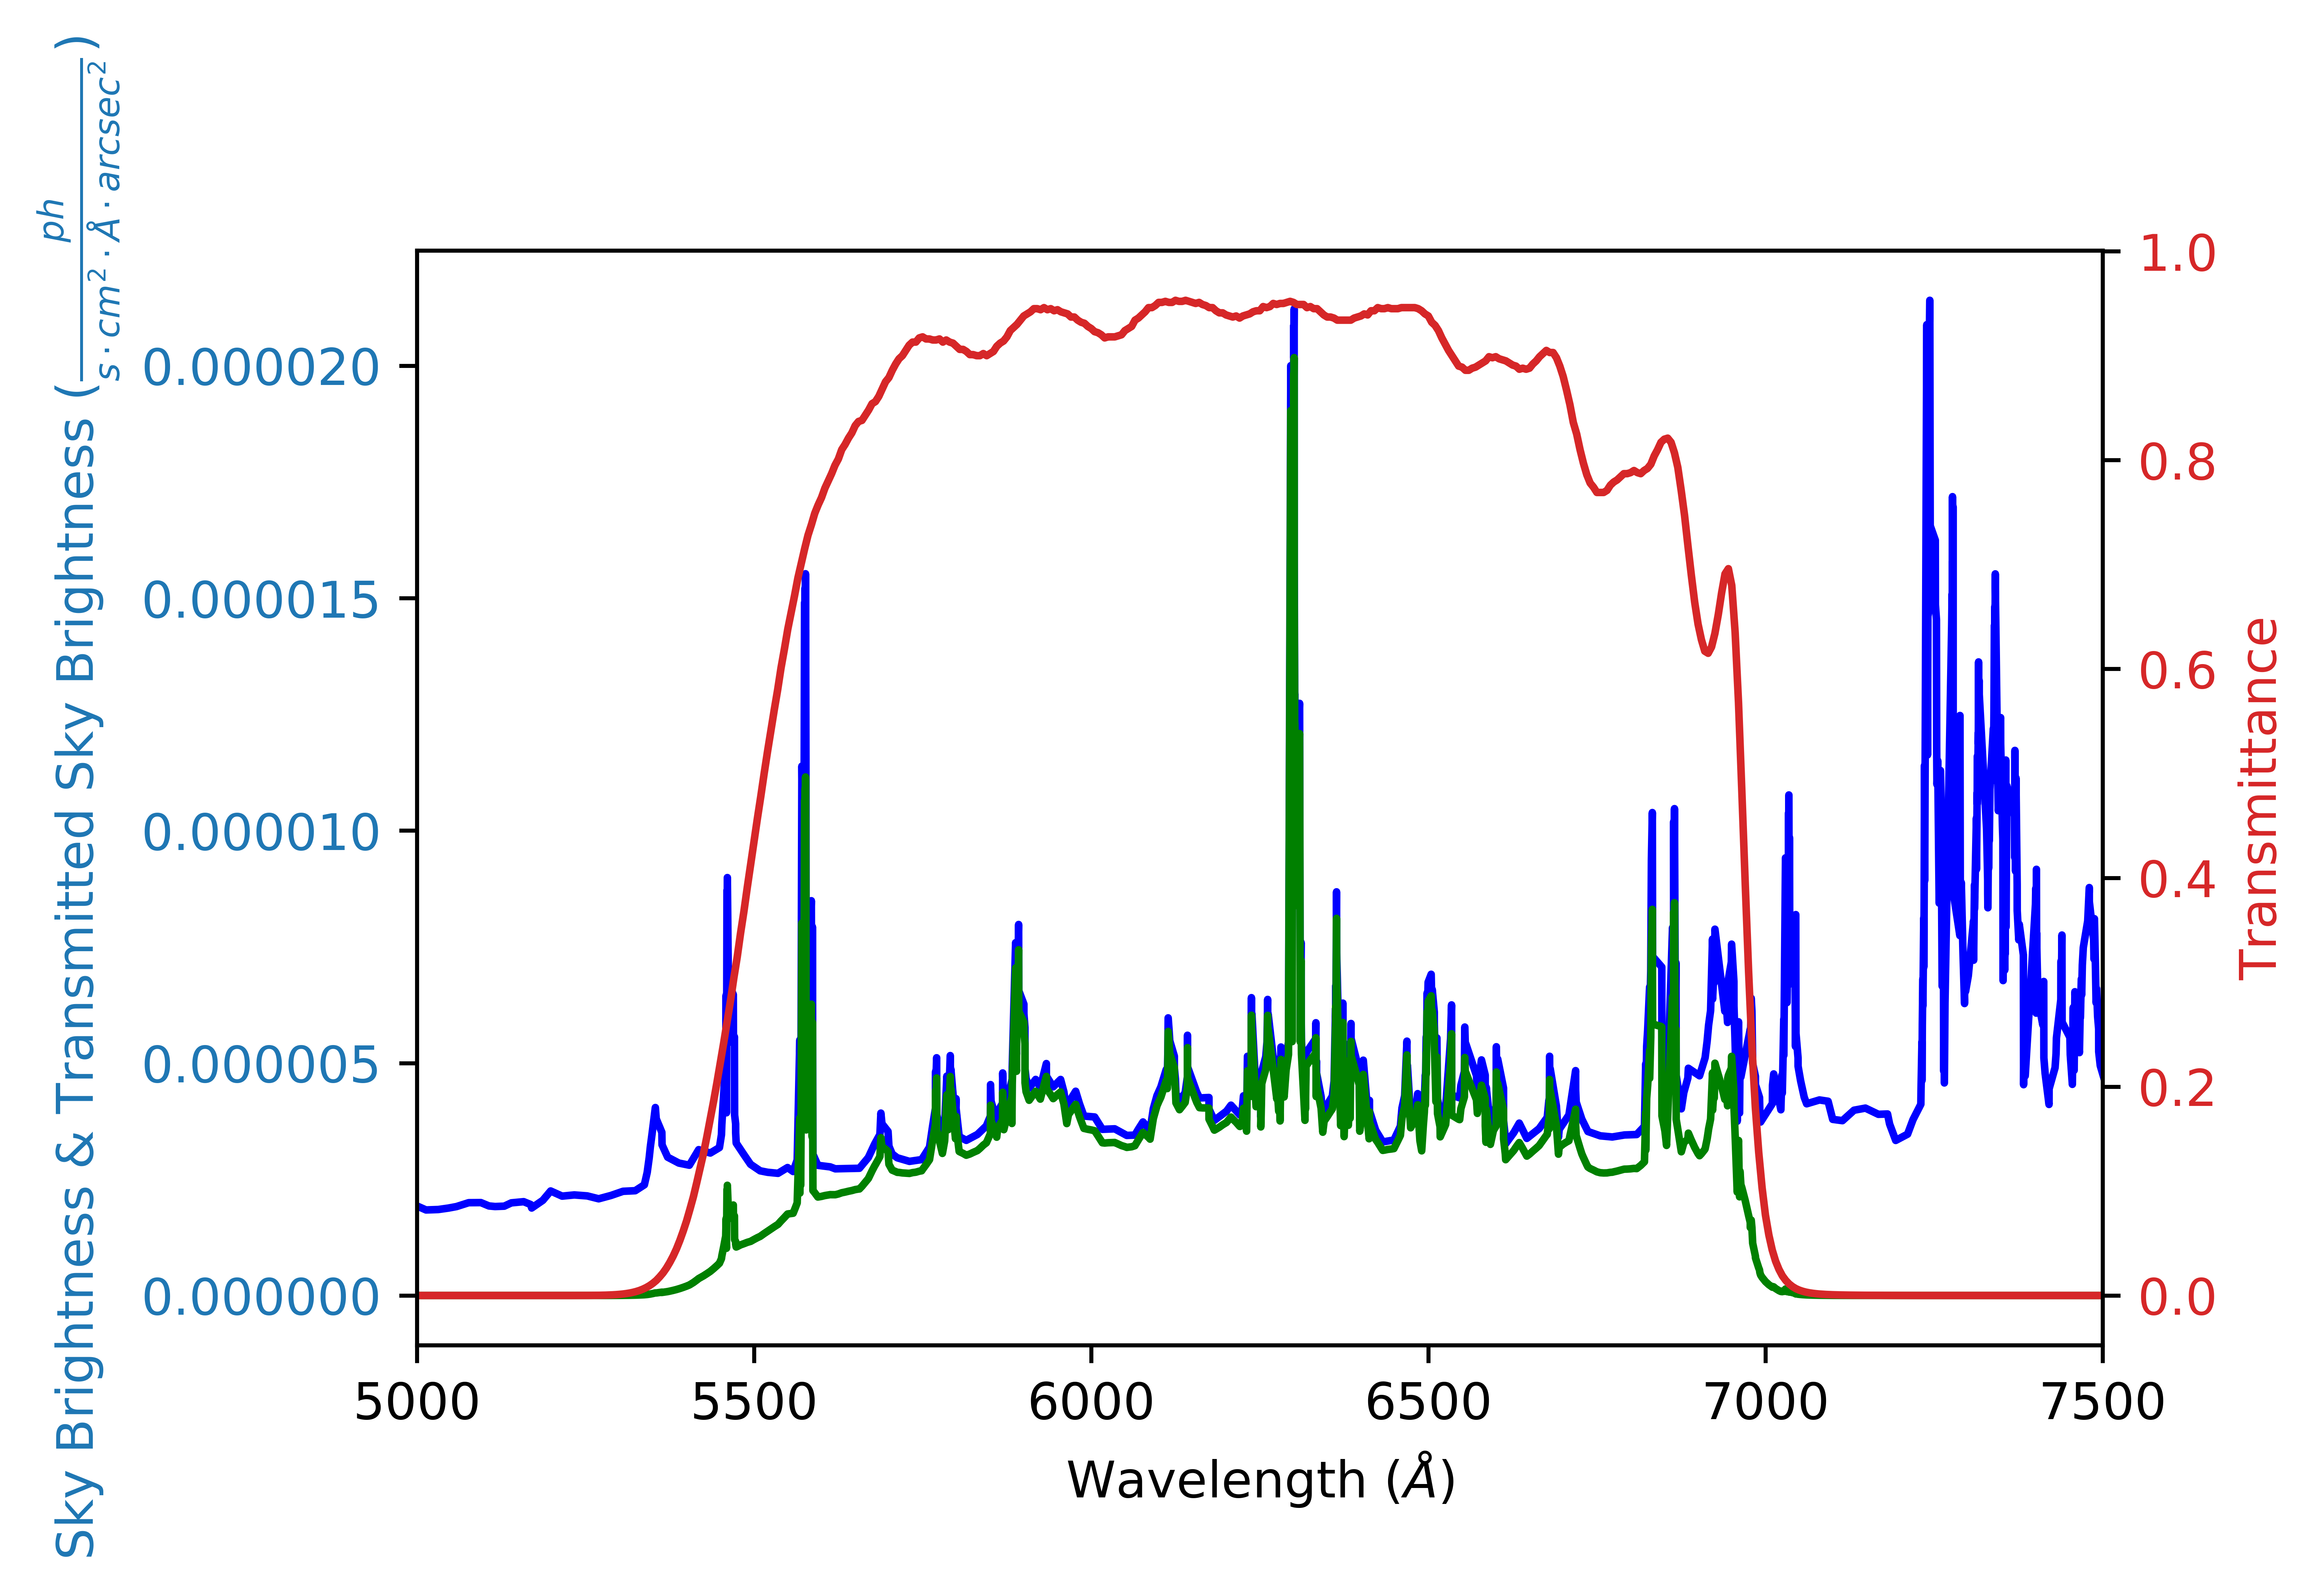

In [7]:
plt.rcParams['figure.dpi'] = 1000
wave = skythrough.waveset
wave1 = filterse.waveset
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel(r'Wavelength ($\AA$)')
ax1.set_ylabel(
    r'Sky Brightness & Transmitted Sky Brightness $(\frac{ph}{s\cdot{}cm^{2}\cdot{}\AA\cdot{}arcsec^{2}})$', color=color)
ax1.plot(wave, skyss(wave), 'b')
ax1.plot(wave, skythrough(wave), 'g')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(rangelow, rangehigh)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Transmittance', color=color)
ax2.plot(wave1, filterse(wave1), color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.savefig(('Results/'+filternam+'_sky'+'.png'), dpi=1000,
            facecolor='w', edgecolor='w', bbox_inches='tight', pad_inches=0.0)

In [8]:
skytot = skythrough.integrate()

In [9]:
skytot

<Quantity 0.005596946902437229 ph / (cm2 s)>

In [11]:
filer = open(('Results/'+filternam+'_sky'+'.dat'), 'w')
filer.write(str(skytot.to_value())+'\t photons/s/cm^2/arcsec^2')
filer.close()